# <ins><font color="purple"><center>EDA Adult Data Set</center></font></ins>

## <ins> Python Librarys </ins> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## <ins> Add column names to adult csv data set </ins>

In [2]:
column_names = ['Age','Workclass','Fnlgwt','Education','Education_num','Marital_status',
           'Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss',
           'Hours_per_week','Native_country','Income']
df = pd.read_csv('adult.csv', names=column_names)
df.head()

,Age,Workclass,Fnlgwt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## <ins> Handling missing values </ins>

In [3]:
df[df == ' ?'] = np.nan
df.isna().any() 

Age               False
Workclass          True
Fnlgwt            False
Education         False
Education_num     False
Marital_status    False
Occupation         True
Relationship      False
Race              False
Sex               False
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country     True
Income            False
dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   Fnlgwt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_num   32561 non-null  int64 
 5   Marital_status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_gain    32561 non-null  int64 
 11  Capital_loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Native_country  31978 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### <font color="green">Recoding ? as a Mode value of Categorial Variables </font>

In [5]:
for col in ['Workclass', 'Occupation', 'Native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [6]:
df.isna().any()

Age               False
Workclass         False
Fnlgwt            False
Education         False
Education_num     False
Marital_status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country    False
Income            False
dtype: bool

## <ins> Checking the duplicates </ins>

In [7]:
df.duplicated() # True for duplicated in rows

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [8]:
df.duplicated().sum() # Number of duplicated rows

24

In [9]:
len(df)

32561

In [10]:
df.drop_duplicates(inplace=True) # Dropping duplicated rows

In [11]:
len(df)

32537

In [12]:
df.duplicated().sum()

0

## <ins> Search unique values in Variables </ins>

In [13]:
print(df.Workclass.unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [14]:
print(df.Education.unique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


In [15]:
print(df.Marital_status.unique())

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


In [16]:
print(df.Occupation.unique())

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


In [17]:
print(df.Relationship.unique())

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


In [18]:
print(df.Native_country.unique())

[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [19]:
print(df.Income.unique())

[' <=50K' ' >50K']


## <ins> Exploratory Data Analysis </ins>

## <font color='orange'> Univariate Analysis </font>

### <font color="green"> Histograms for Continuous Data </font>

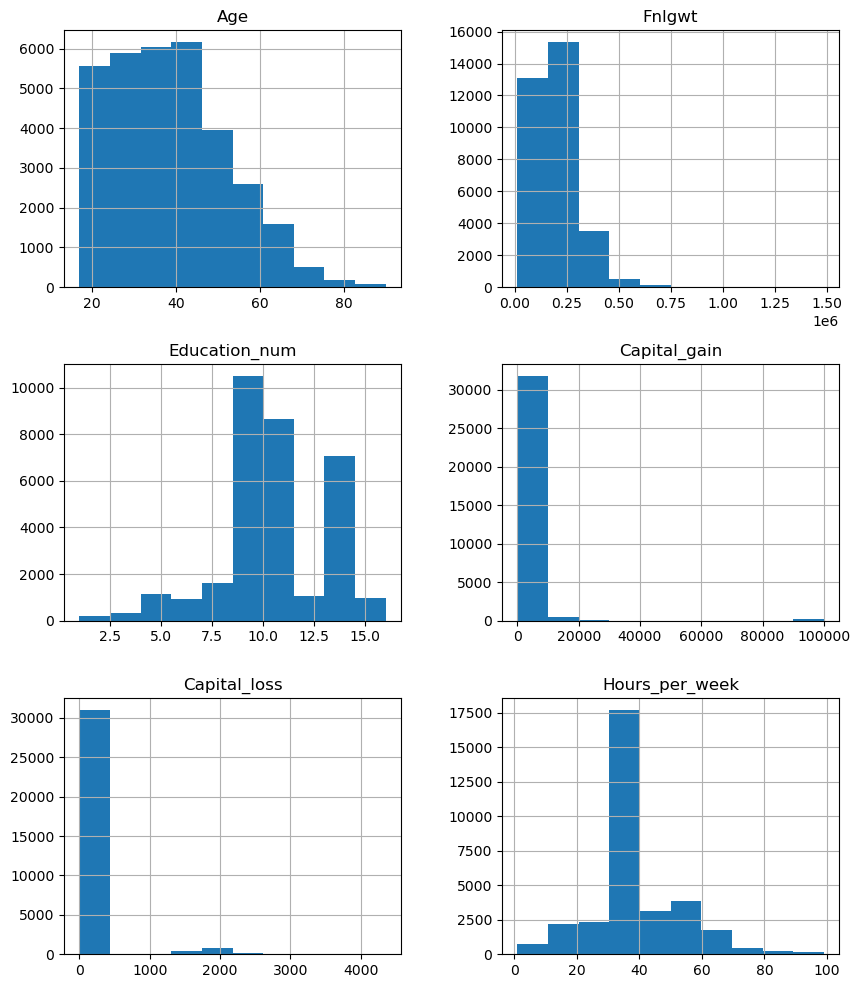

In [20]:
Histogram_graphs=df.select_dtypes(include=['int'])
Histogram_graphs.hist(figsize=(10,12))
plt.show()

### <font color="green"> Draw a pair plot for dataset </font>

C:\Users\sanda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


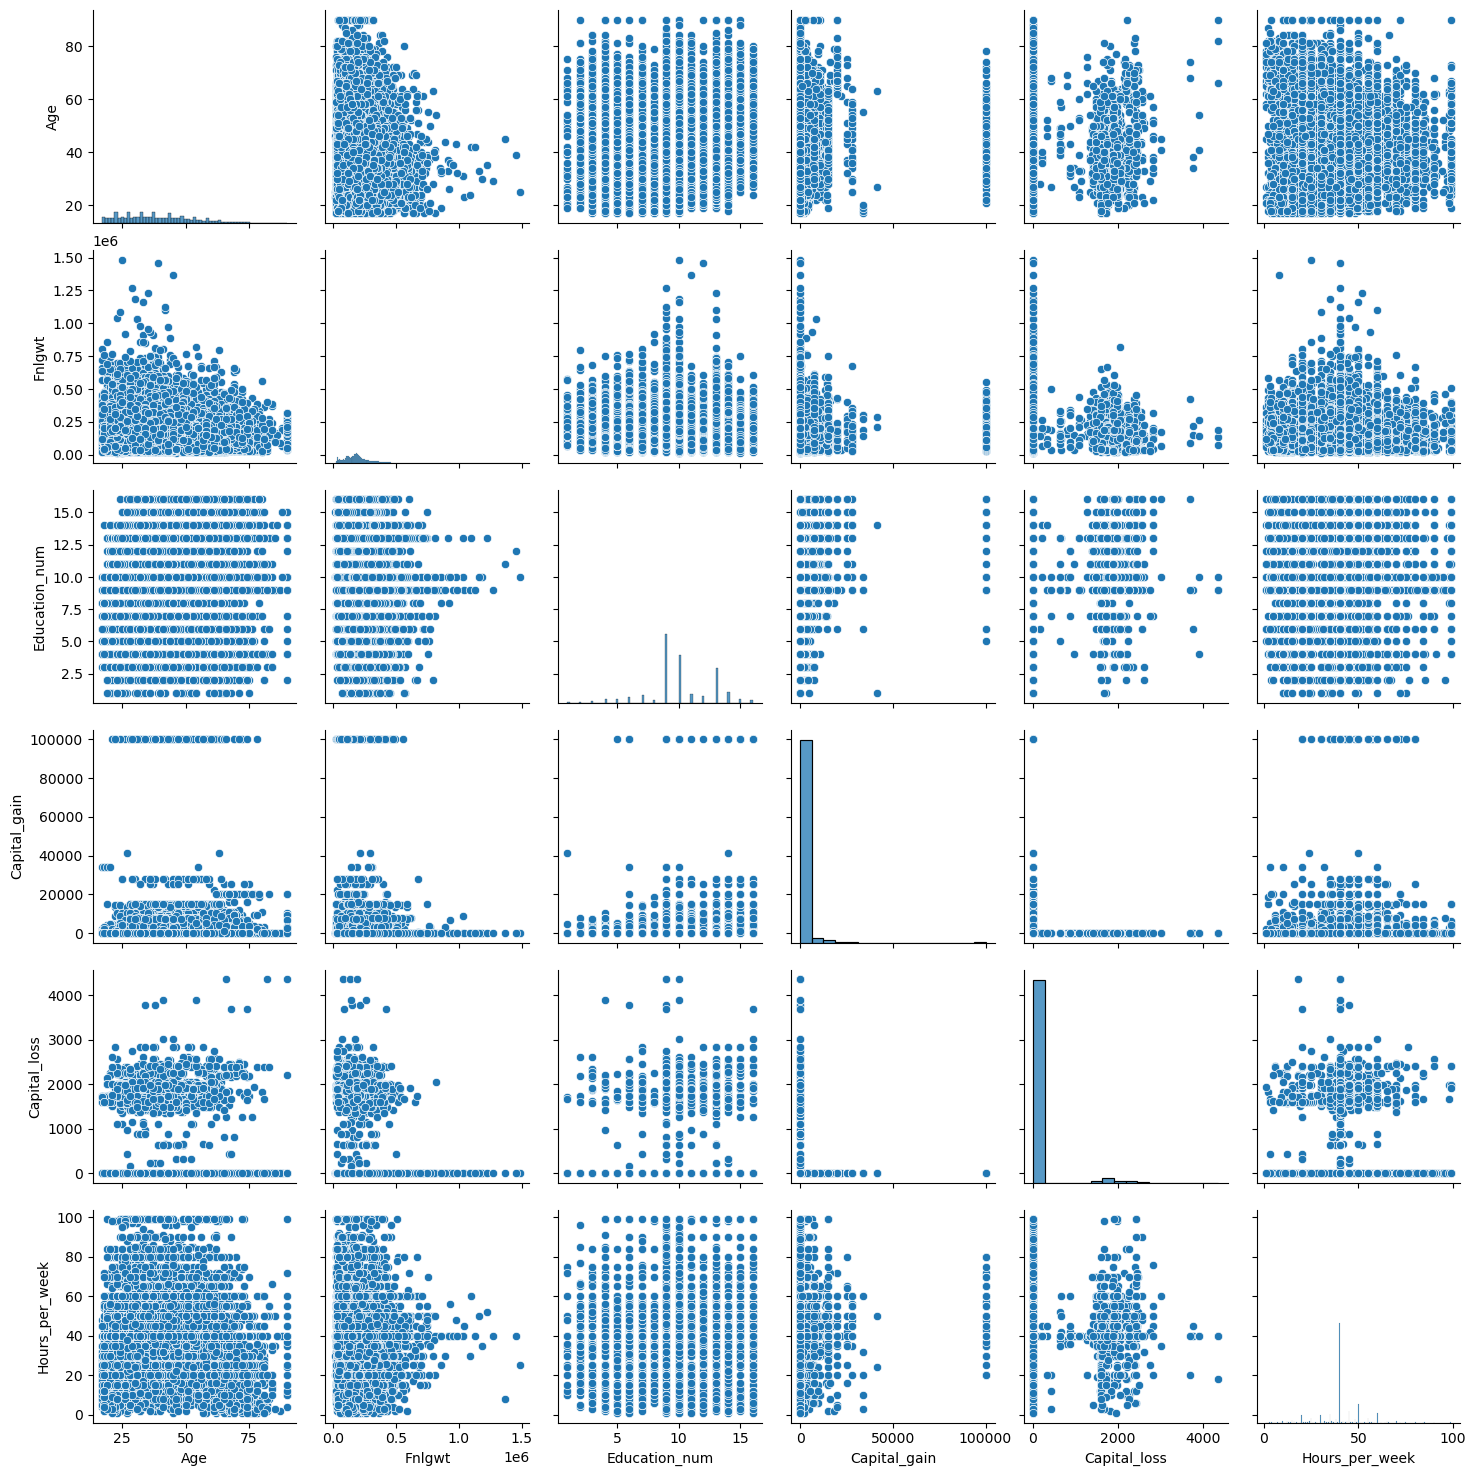

In [21]:
sns.pairplot(df)
plt.show()

## <ins> Counts plots for variables <ins>

### <font color='green'> Workclass, Education, Marital_status, Occupation, Relationship, Race </font>

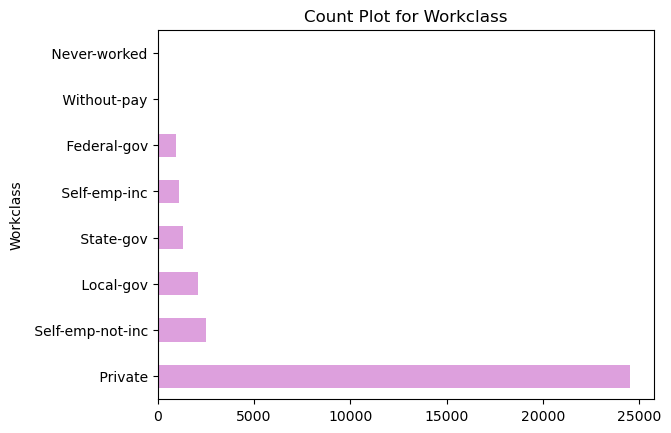

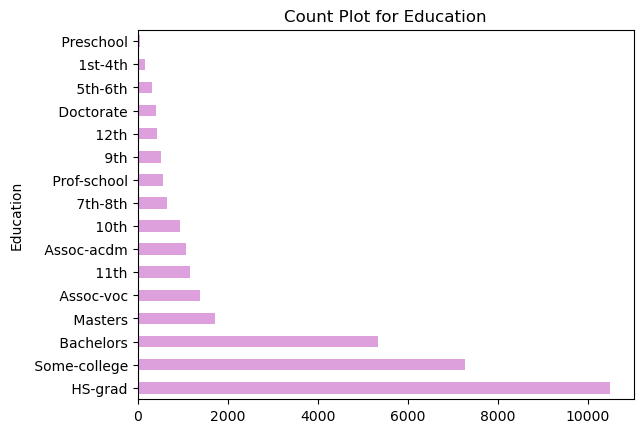

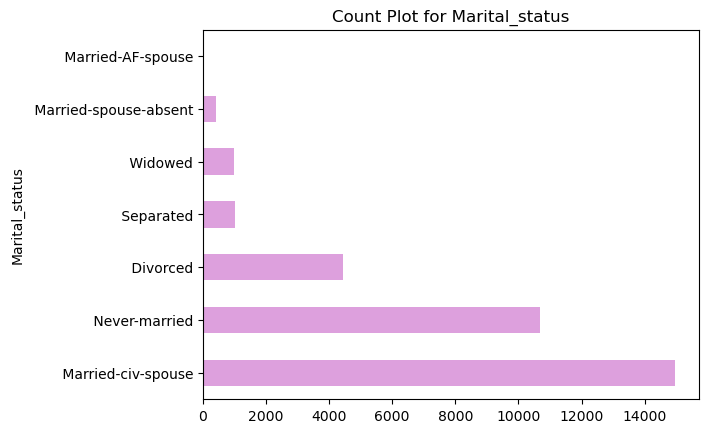

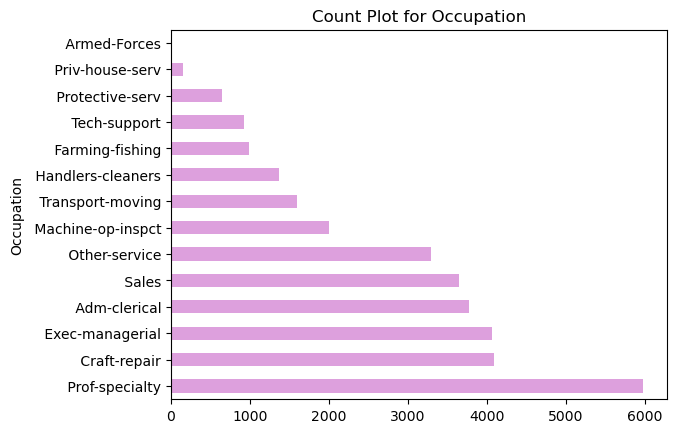

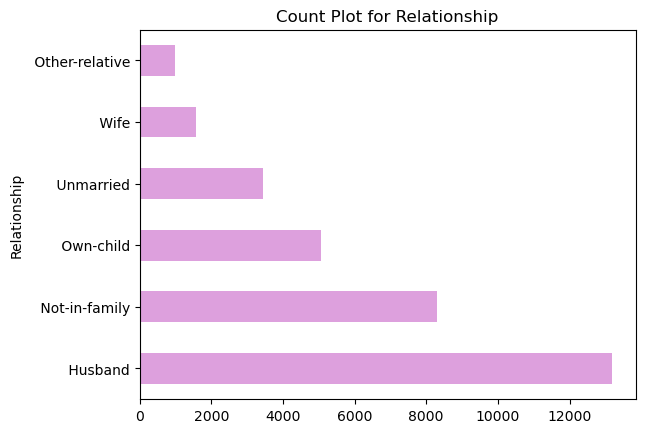

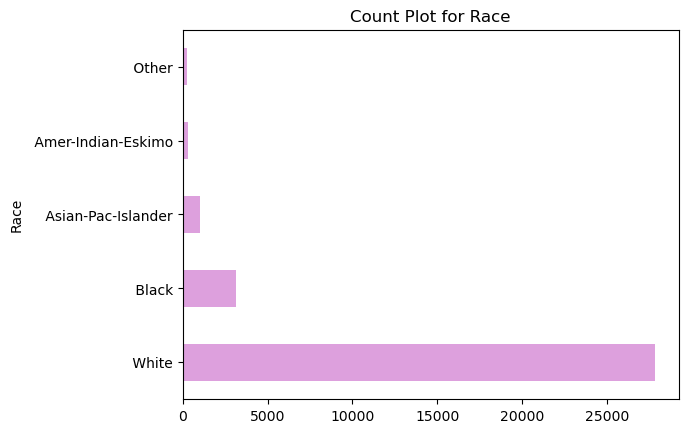

In [22]:
categorical_columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race']

for colname in categorical_columns:
    plt.title('Count Plot for ' + colname)

    (df[colname].value_counts().head(20).plot(kind='barh', color='plum'))
    plt.show()
    

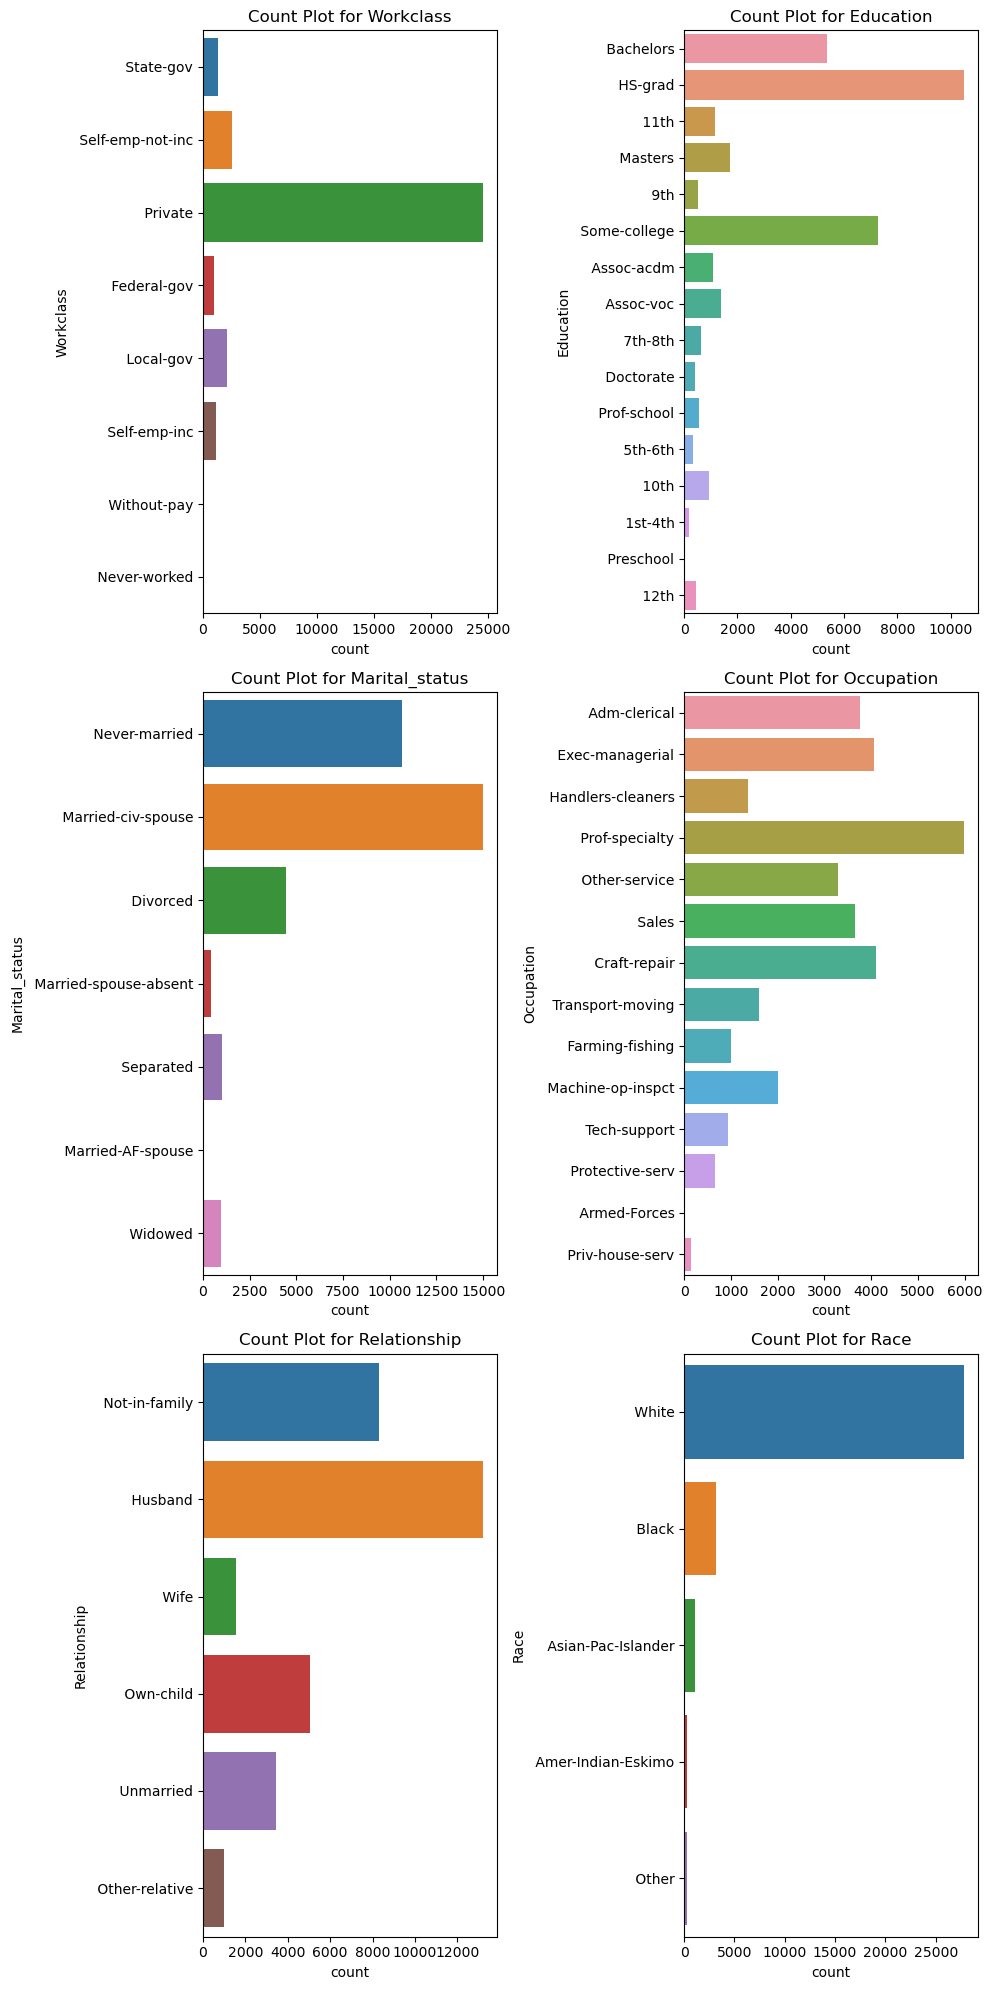

In [23]:
categorical_columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race']

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through the categorical columns and create count plots
for i, column in enumerate(categorical_columns):
    sns.countplot(y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot for {column}')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

### <font color='green'> Income </font>

<Axes: xlabel='Income', ylabel='count'>

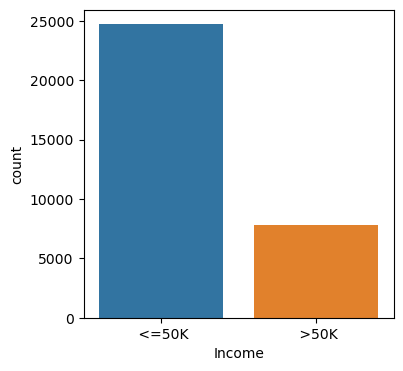

In [24]:
plt.figure(figsize=(4,4))
sns.countplot(x="Income", data=df)

##  <ins> Pie Chart for Gender </ins> 

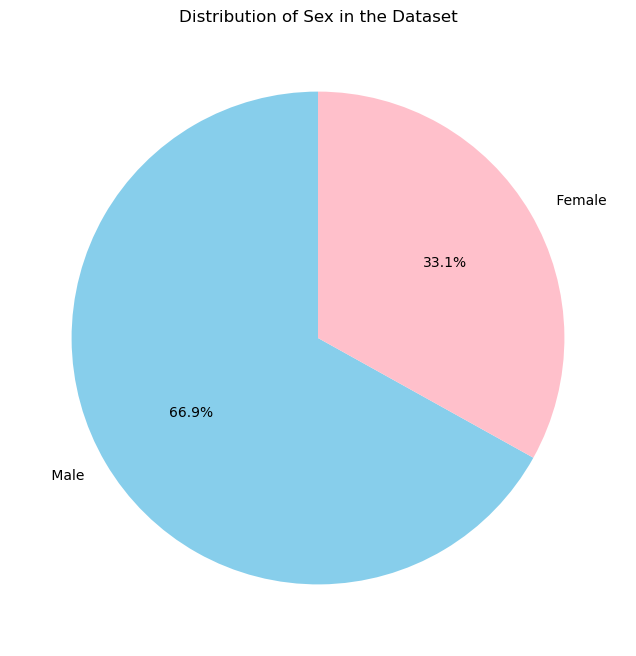

In [25]:
sex_counts = df['Sex'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Distribution of Sex in the Dataset')
plt.show()


## <ins> Count Plots Based on Income </ins>

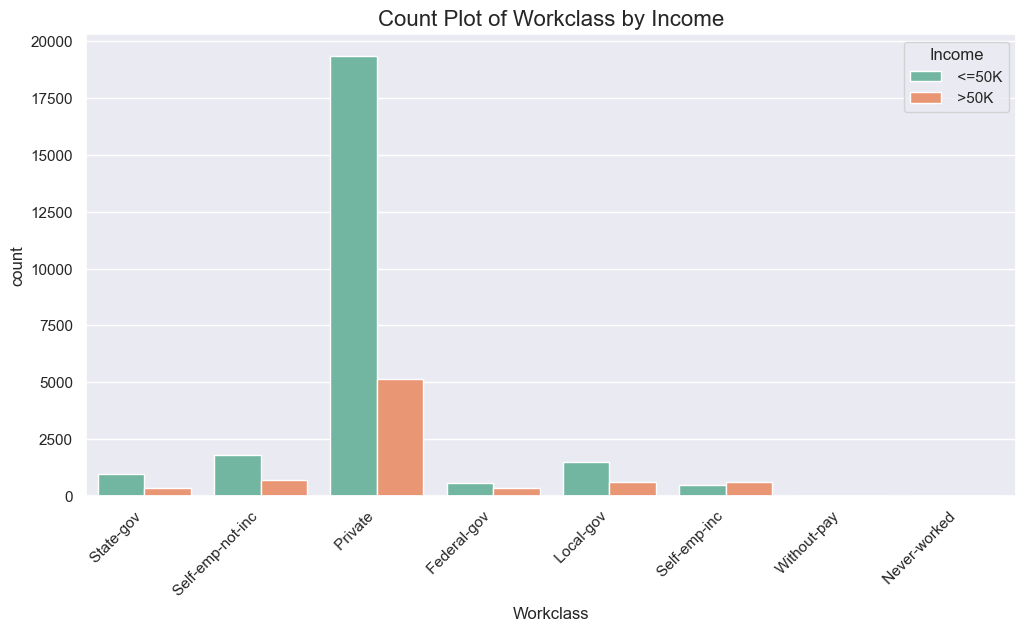

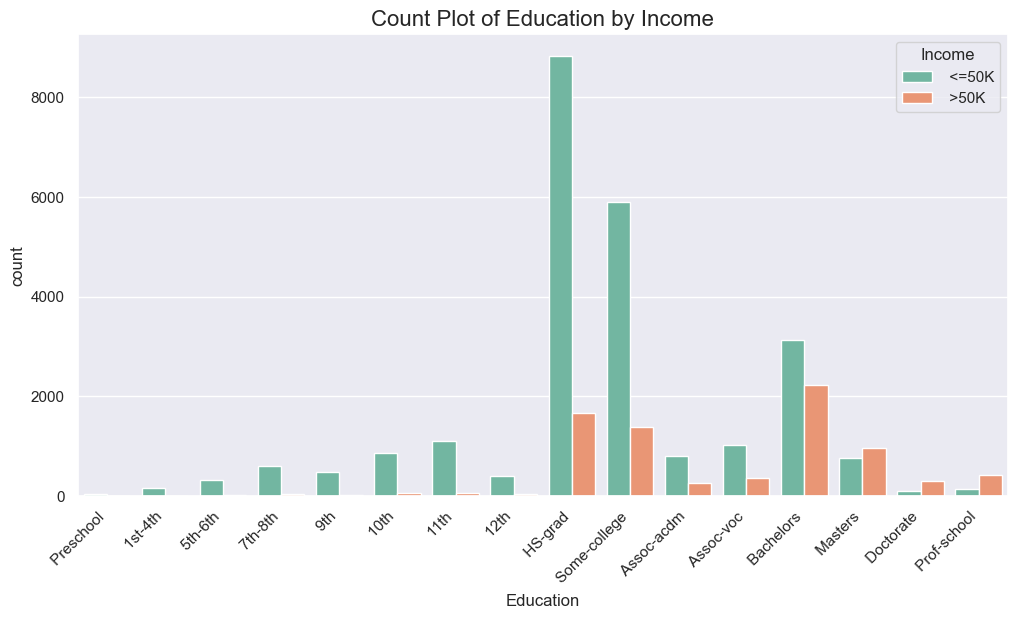

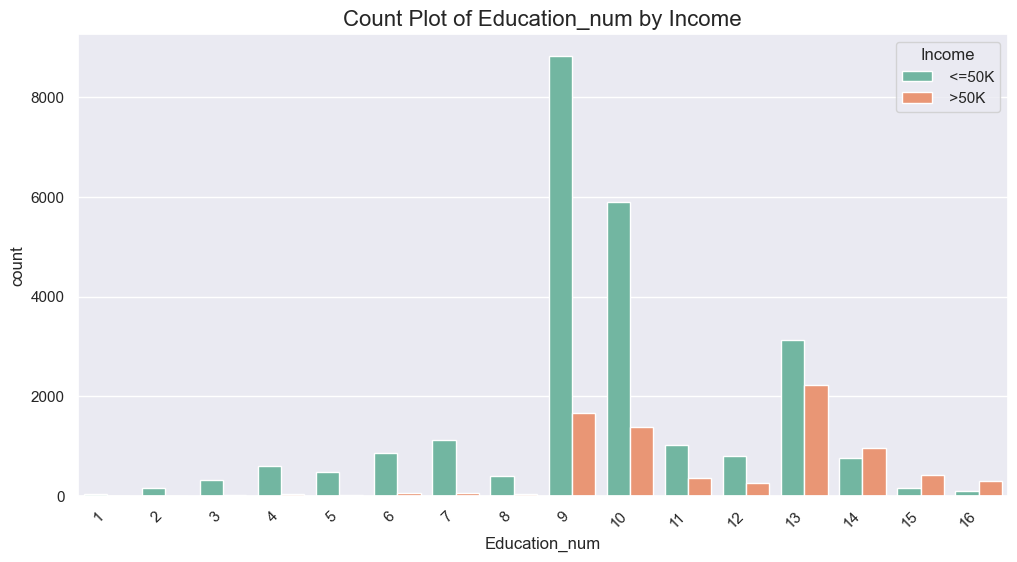

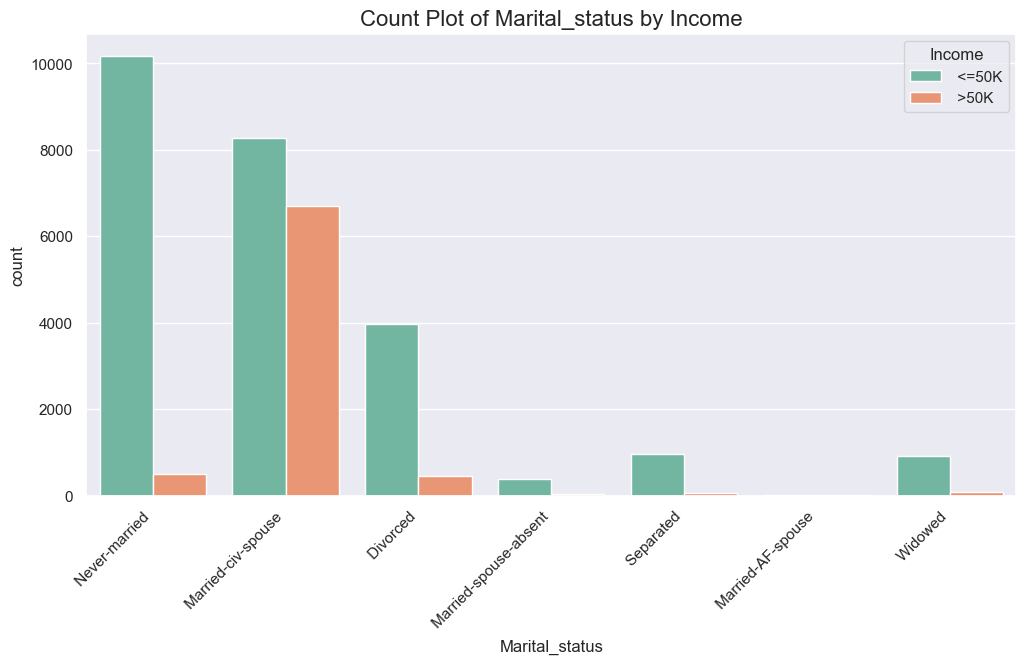

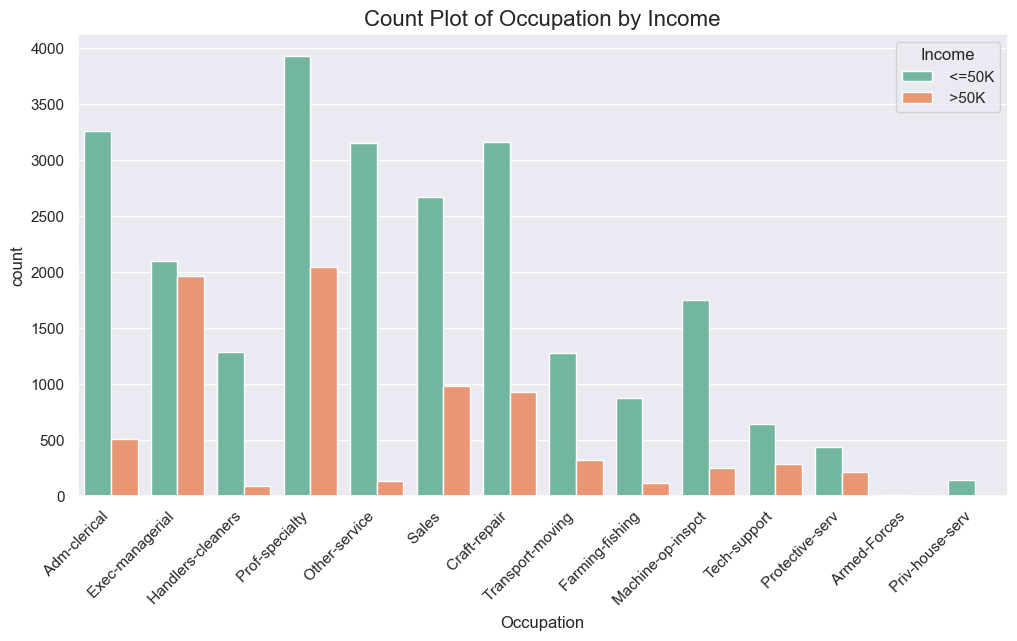

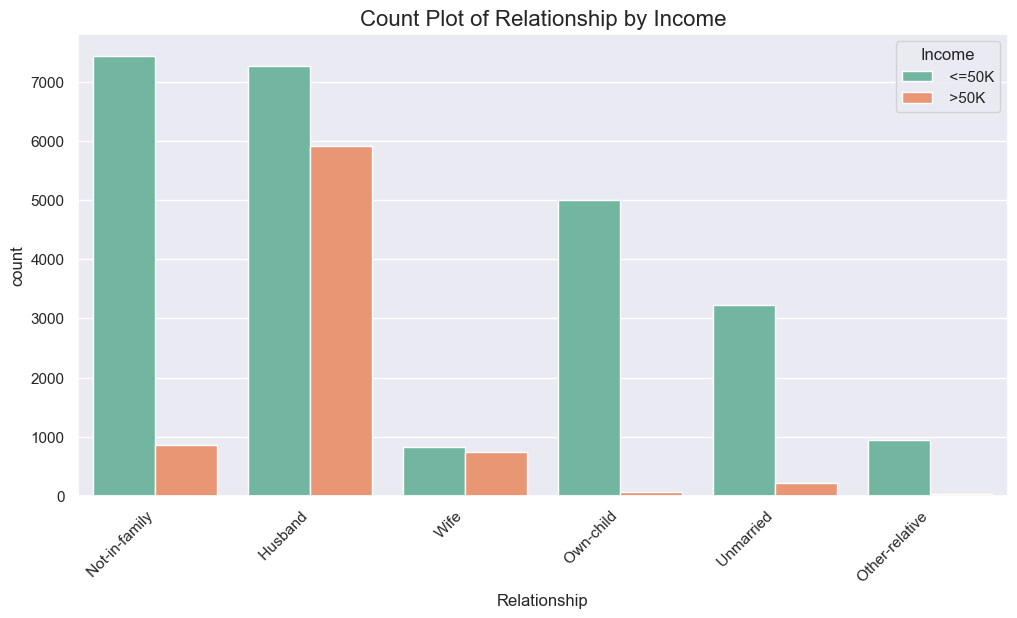

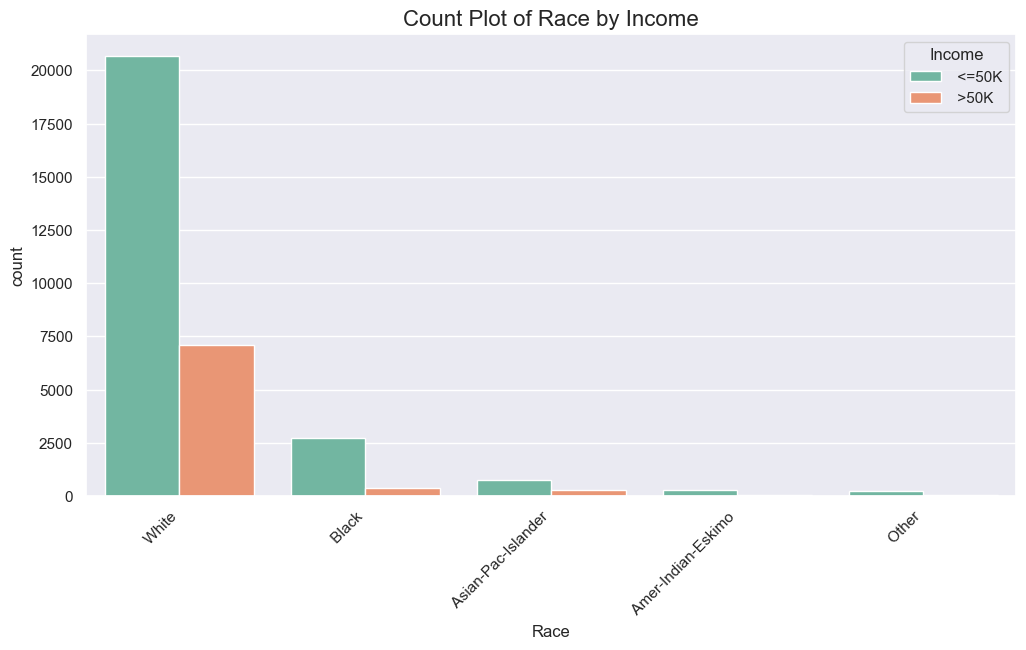

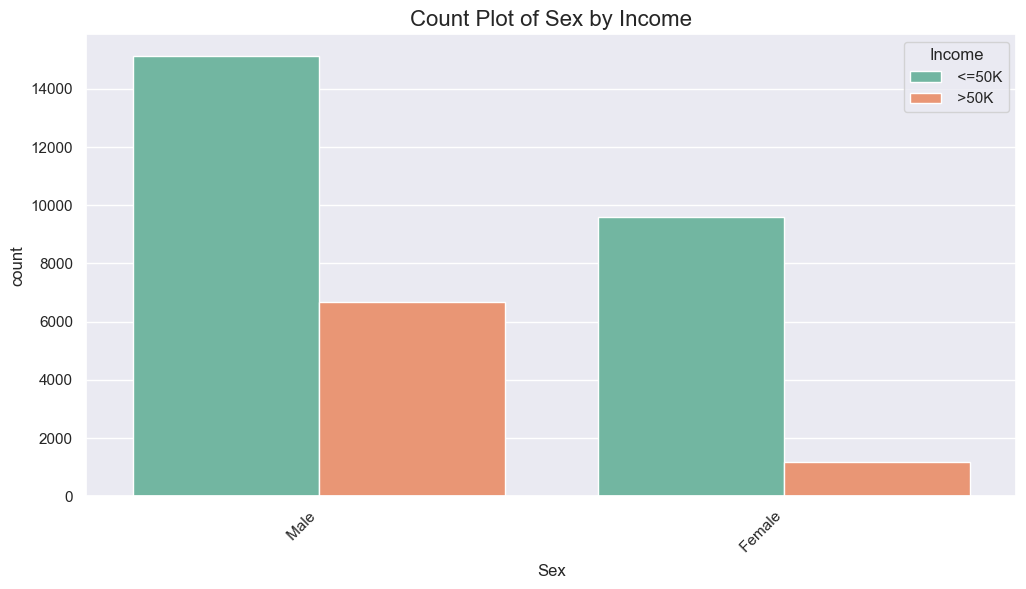

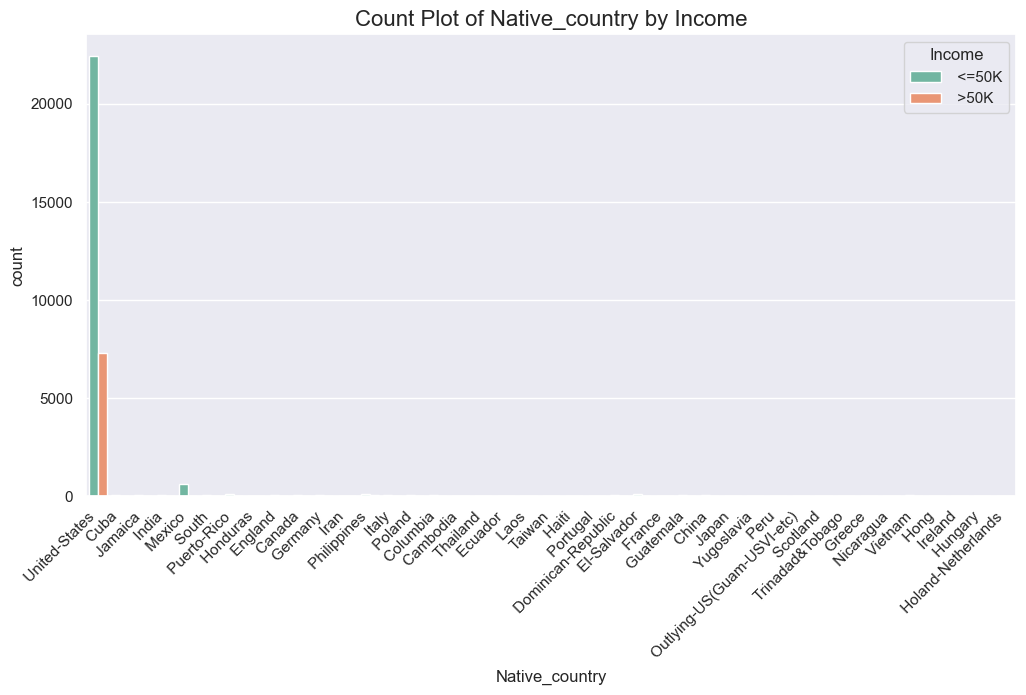

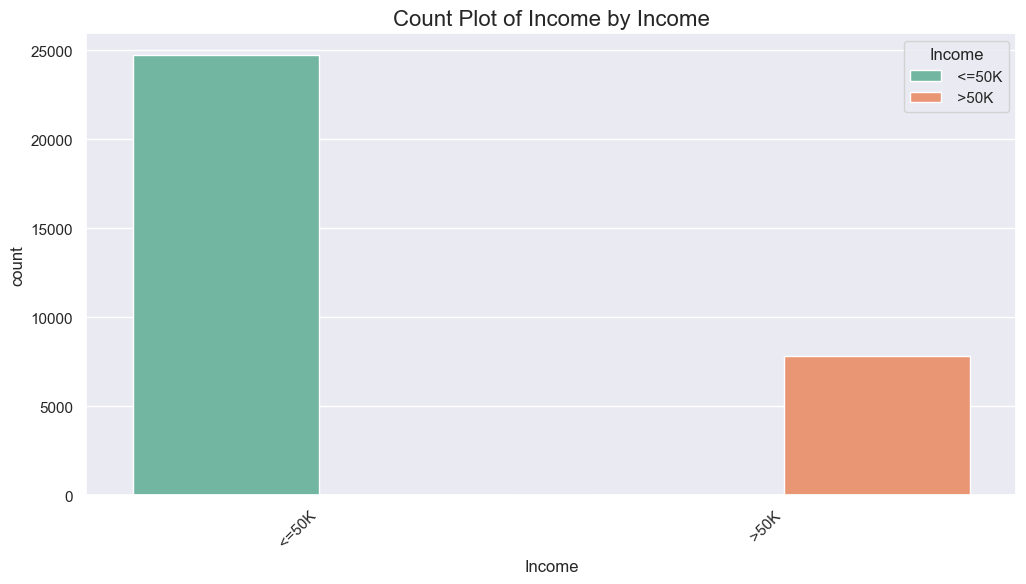

In [26]:
# Categorical columns in the dataset
categorical_columns = ['Workclass', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

# Set the style of seaborn for better visualization
sns.set(style="darkgrid")

# Plot count plots for each categorical variable
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    
    # Set the order for 'Education' variable
    if column == 'Education':
        order = sorted(df['Education'].unique(), key=lambda x: [' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th', 
                ' HS-grad', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Masters', ' Doctorate', ' Prof-school'].index(x))
        sns.countplot(x=column, hue='Income', data=df, palette='Set2', order=order)
    else:
        sns.countplot(x=column, hue='Income', data=df, palette='Set2')
    
    plt.title(f'Count Plot of {column} by Income', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.show()

C:\Users\sanda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


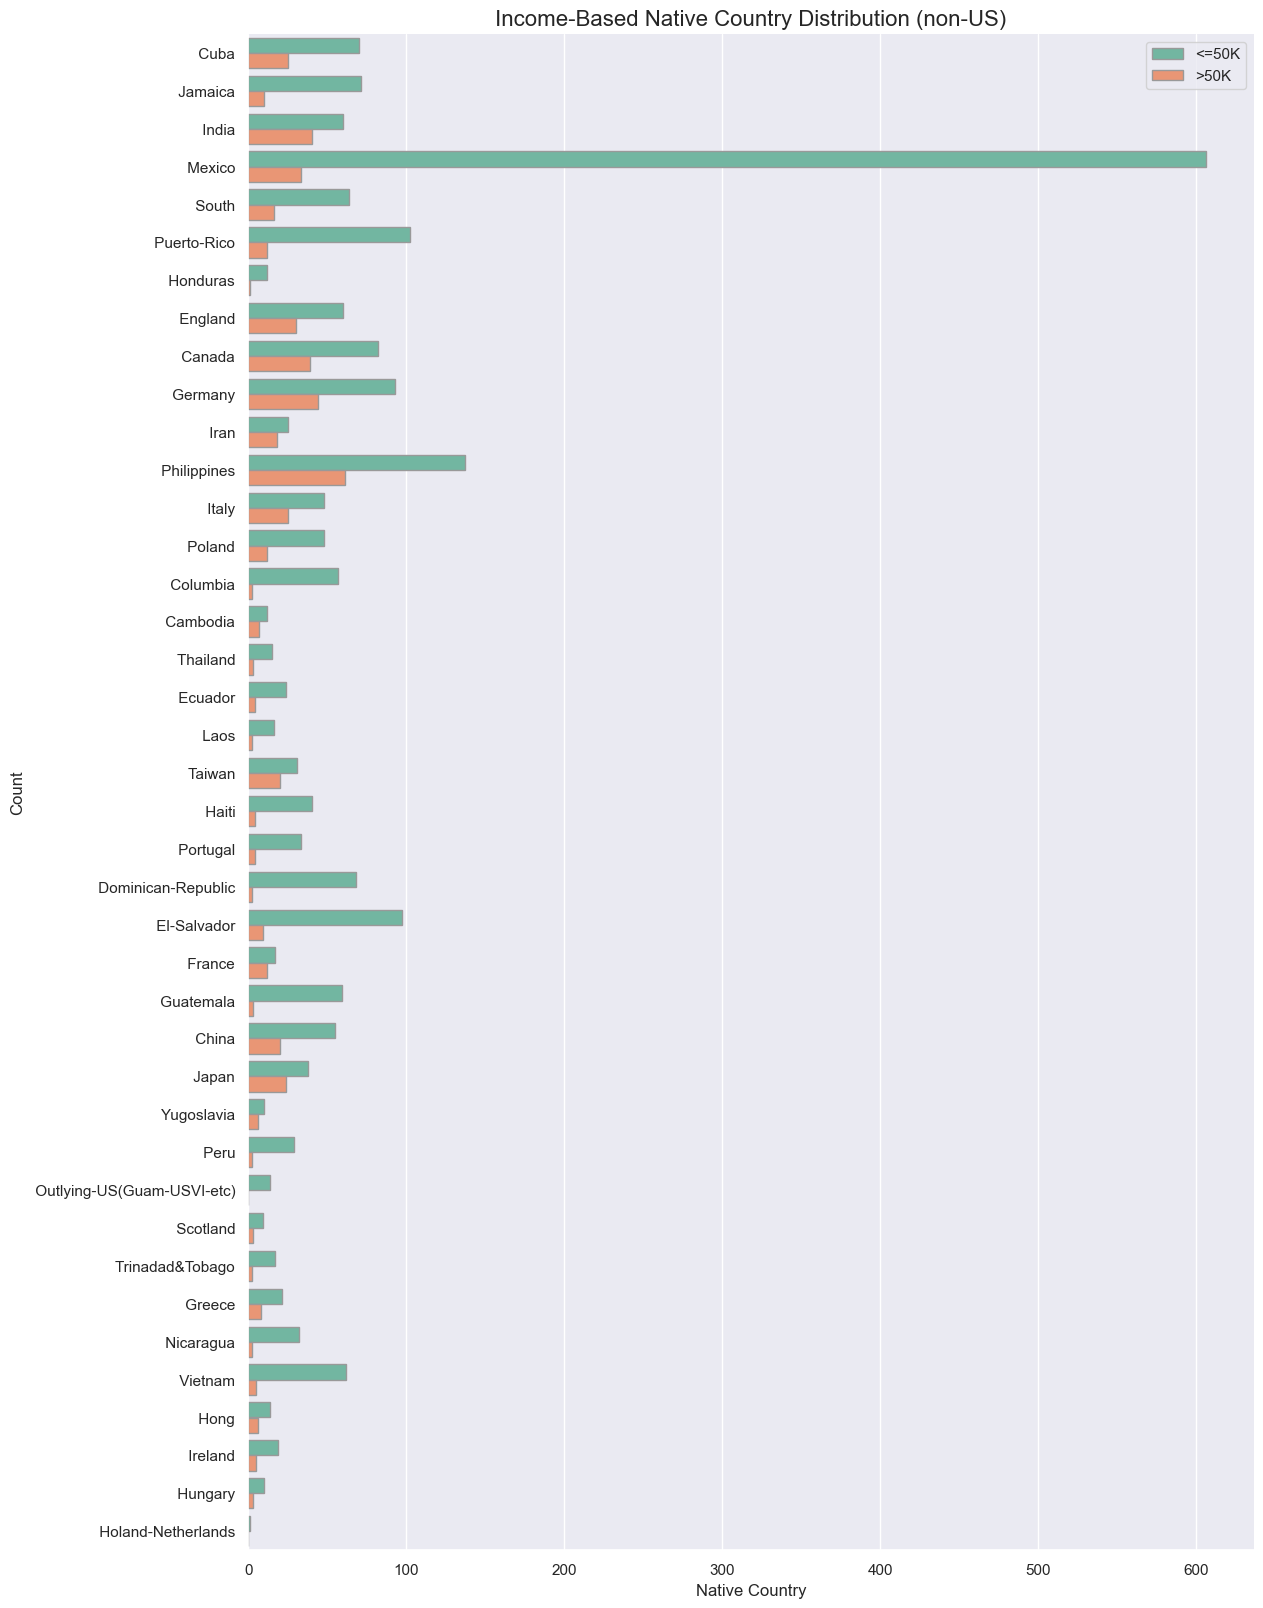

In [27]:
plot = sns.catplot(data=df.query('Native_country != " United-States"'), y='Native_country', hue="Income", kind="count",
                   palette="Set2", edgecolor=".6", legend=False,
                   height=16, aspect=.8, orient='v');
plot.set_xlabels('Native Country');
plot.set_ylabels('Count');
plt.legend(loc='upper right', labels=['<=50K', '>50K']);
plt.title('Income-Based Native Country Distribution (non-US)', fontsize=16);

## <ins> Cross Table Based on Sex </ins>

In [28]:
column_name=["Age", "Workclass", "Education", "Education_num", "Marital_status", "Occupation", "Relationship", "Race", "Sex", "Native_country"]
for column in column_name:
    if column != 'Income':
        print(pd.crosstab(df[column], df['Income'], margins=True, margins_name='Total'))
        print("\n")

Income   <=50K   >50K  Total
Age                         
17         395      0    395
18         550      0    550
19         706      2    708
20         752      0    752
21         715      3    718
...        ...    ...    ...
86           1      0      1
87           1      0      1
88           3      0      3
90          34      8     42
Total    24698   7839  32537

[74 rows x 3 columns]


Income              <=50K   >50K  Total
Workclass                              
 Federal-gov          589    371    960
 Local-gov           1476    617   2093
 Never-worked           7      0      7
 Private            19357   5152  24509
 Self-emp-inc         494    622   1116
 Self-emp-not-inc    1816    724   2540
 State-gov            945    353   1298
 Without-pay           14      0     14
Total               24698   7839  32537


Income          <=50K   >50K  Total
Education                          
 10th             871     62    933
 11th            1115     60   1175
 12th       

## <font color='orange'> Bivariate Analysis </color>

## <ins> Density Plots Hours_per_week and Age Based on Income </ins>

C:\Users\sanda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sanda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


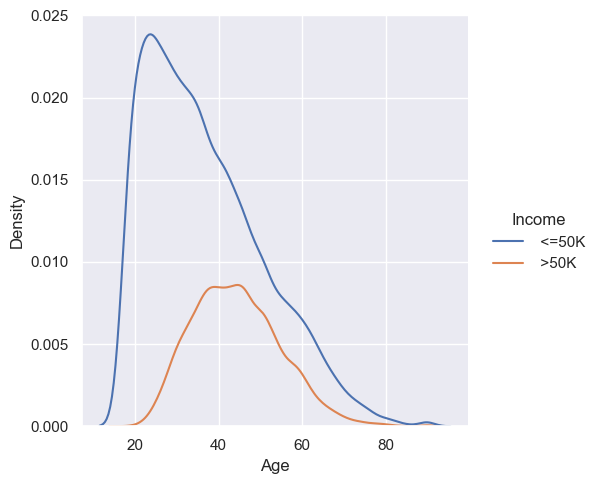

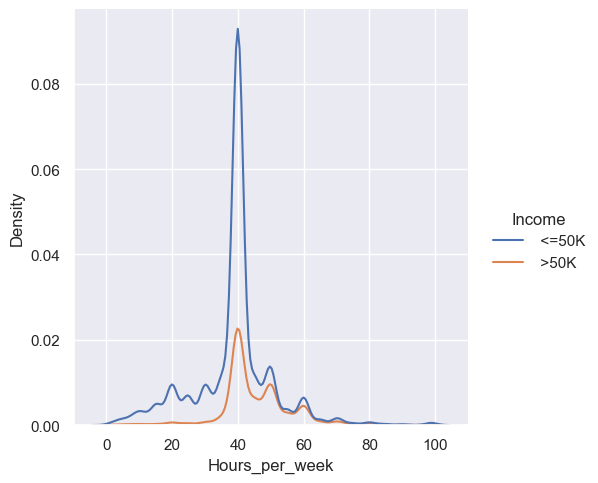

In [29]:
sns.displot(x='Age', hue='Income', data=df, kind='kde')
sns.displot(x='Hours_per_week', hue='Income', data=df, kind='kde')

## <ins>Violine Plot for Age Based on Income</ins>

Text(0.5, 1.0, 'Violin Plot of Age by Income')

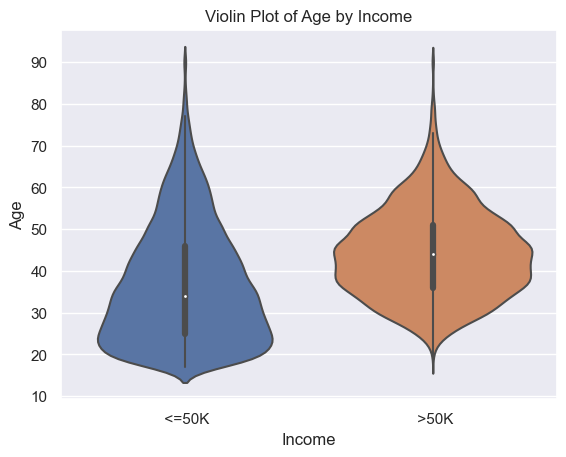

In [30]:
sns.violinplot(x = 'Income', y = 'Age', data = df, size = 6)
plt.title('Violin Plot of Age by Income')

## <ins> Bar Plot For Income Vs Categoriacal Variables </ins>

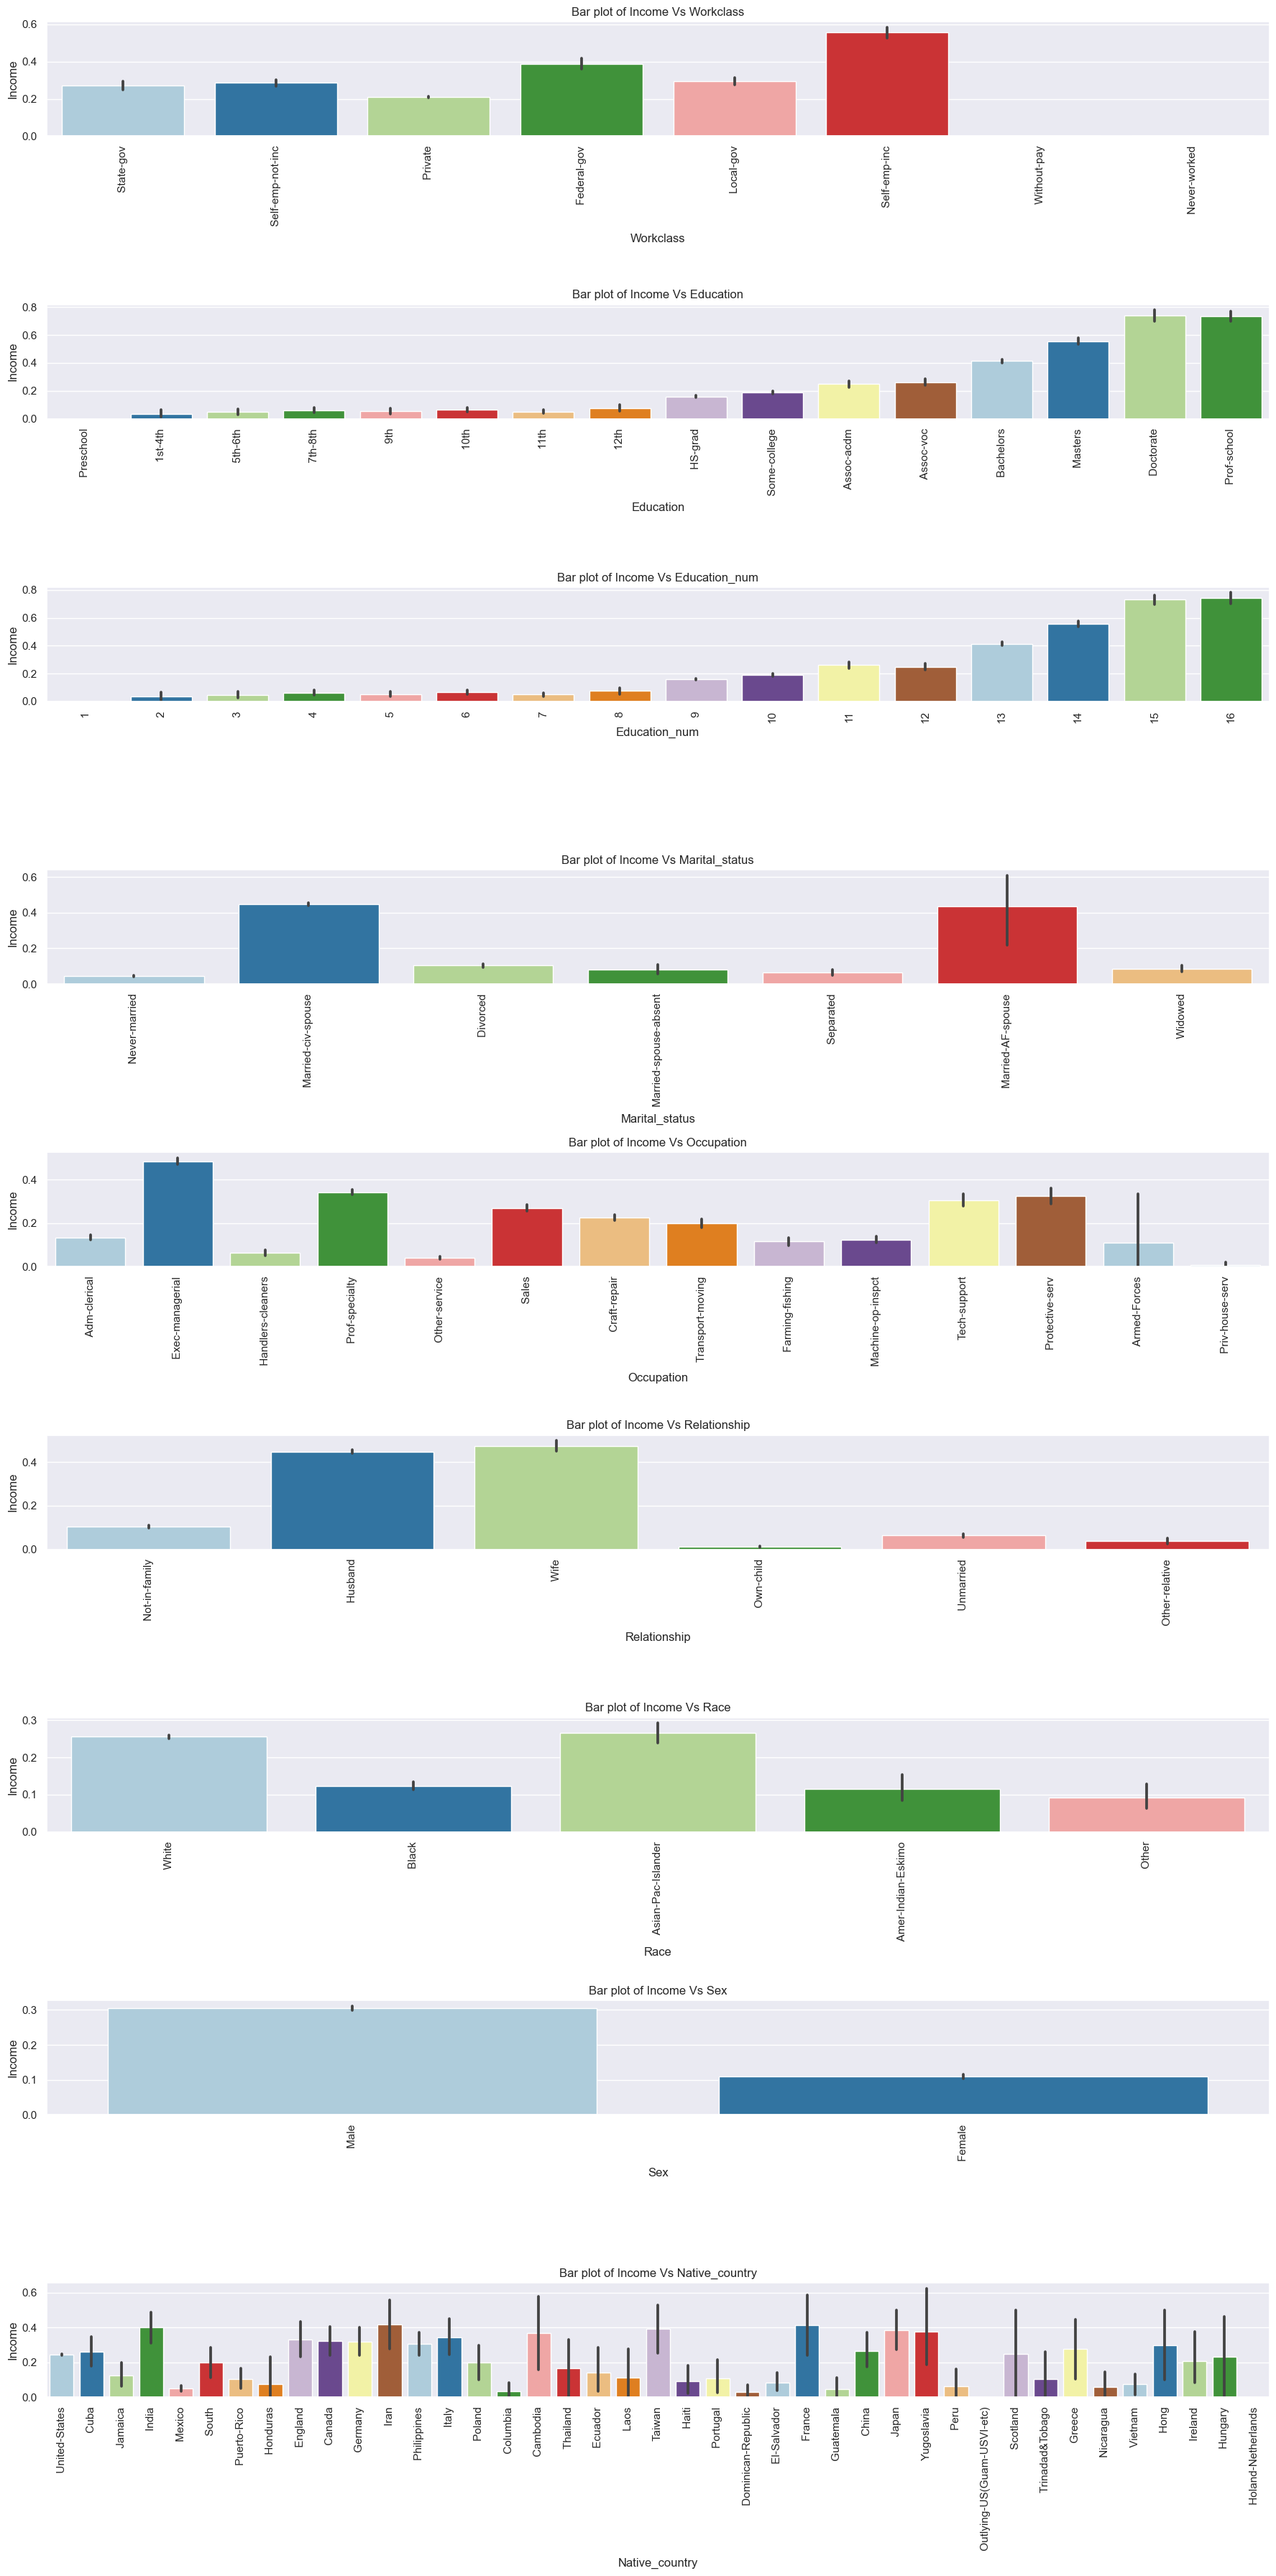

In [31]:
df1 = df.copy()
# Convert 'Income' column to binary values (1 if '>50K', 0 otherwise)
df1['Income'] = df['Income'].apply(lambda x: 1 if x == ' >50K' else 0)
education_order = [' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th', ' HS-grad', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Masters', ' Doctorate', ' Prof-school']
# List of categorical variables to include in the plot
categorical_vars = ['Workclass', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']

# Determine the number of rows and columns dynamically
num_plots = len(categorical_vars)
num_cols = min(1, num_plots) 
num_rows = (num_plots - 1) // num_cols + 1

# Create a grouped bar plot for each categorical variable
plt.figure(figsize=(18, 4 * num_rows))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.barplot(x=var, y="Income", data=df1, order=education_order if var == 'Education' else None, palette="Paired")
    plt.xticks(rotation=90)
    plt.title(f"Bar plot of Income Vs {var}")

plt.tight_layout()
plt.show()

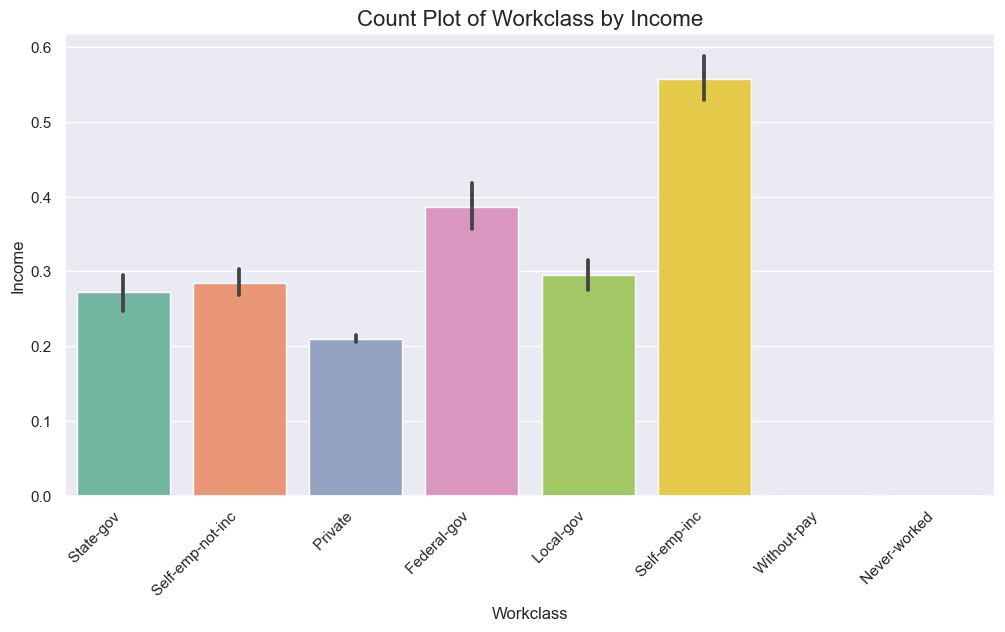

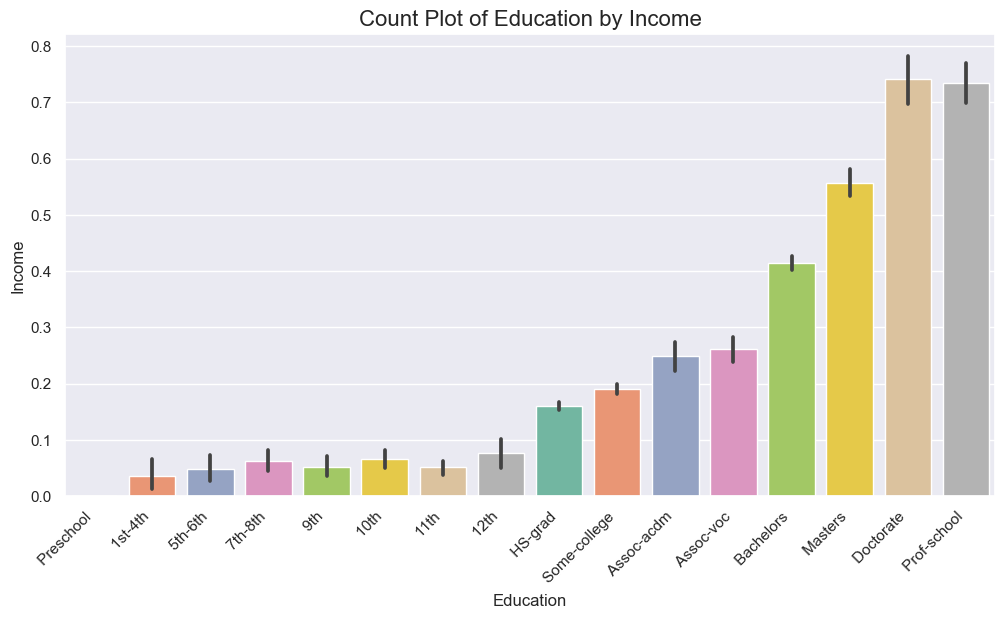

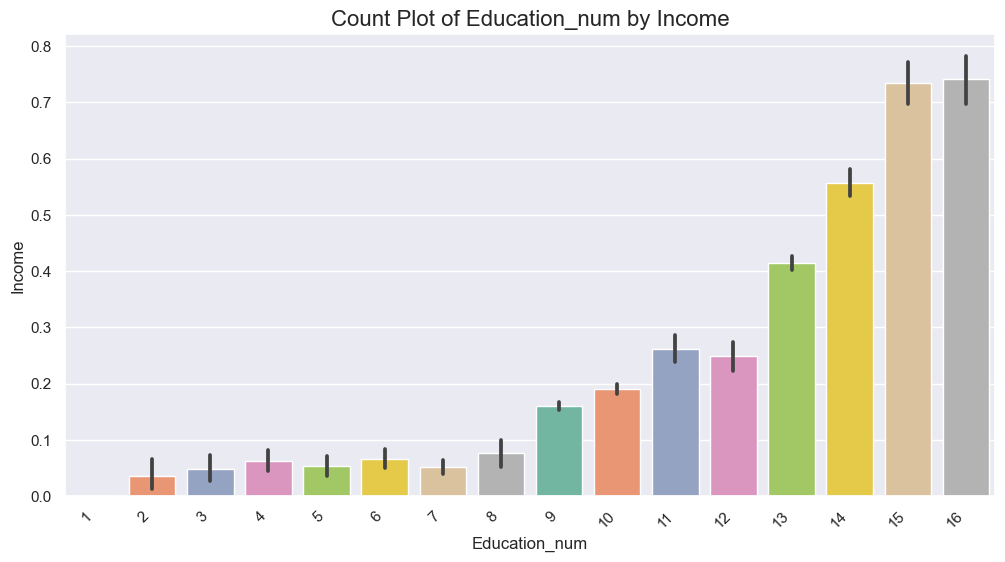

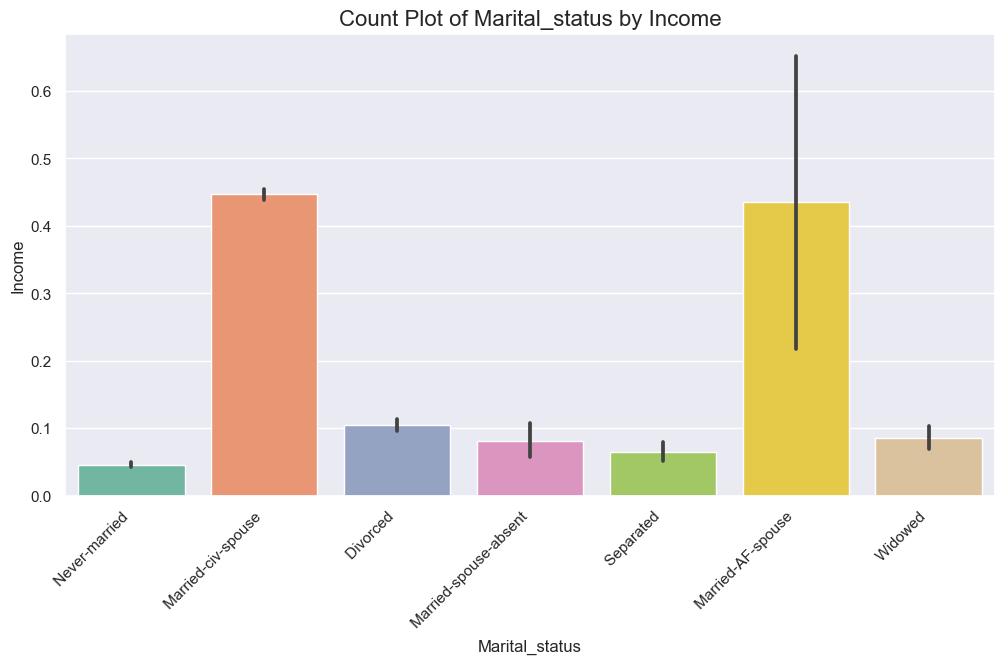

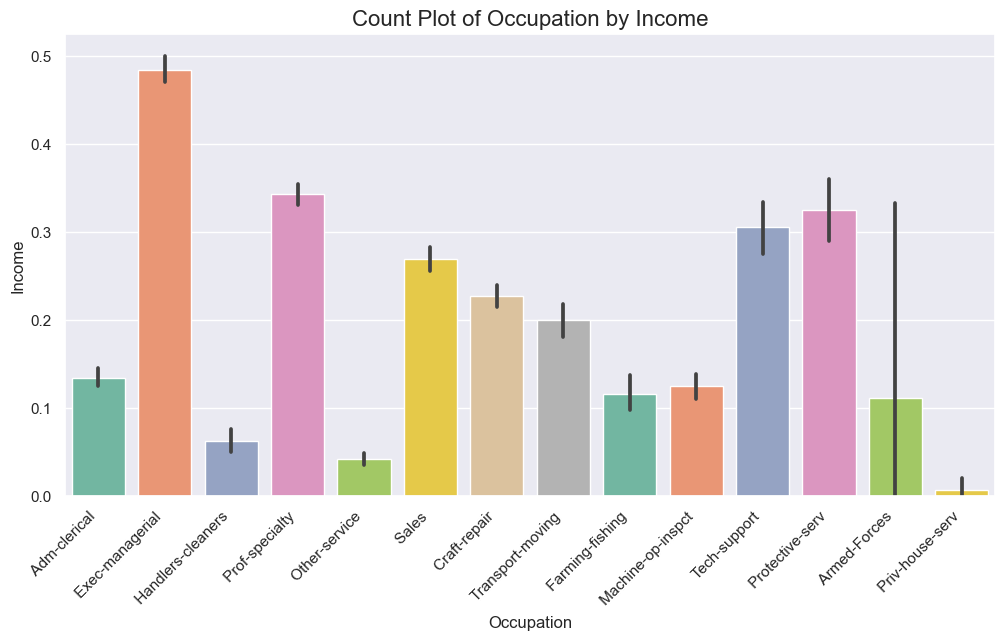

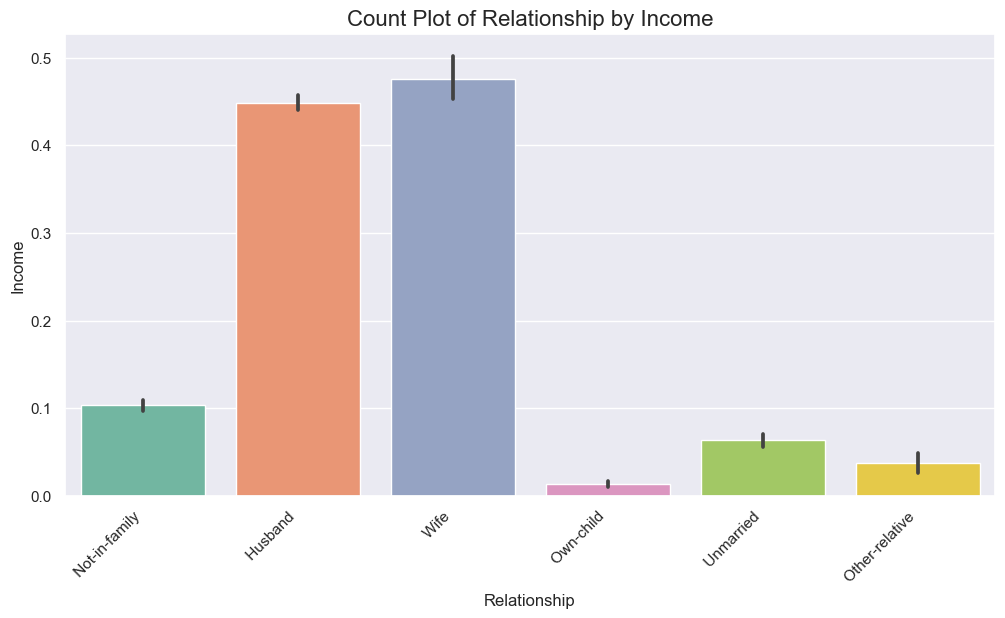

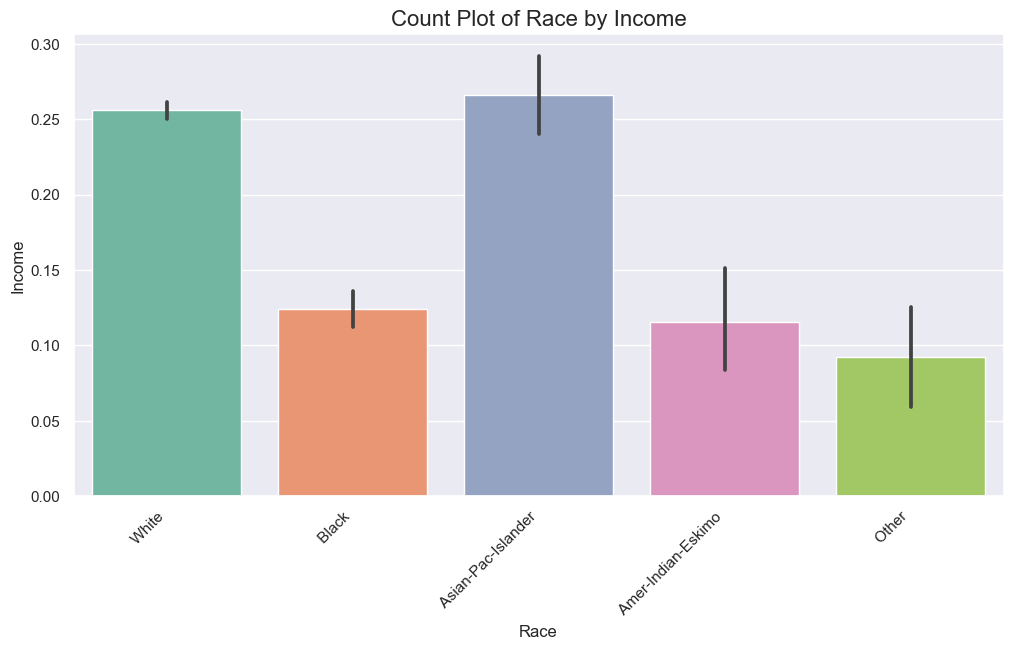

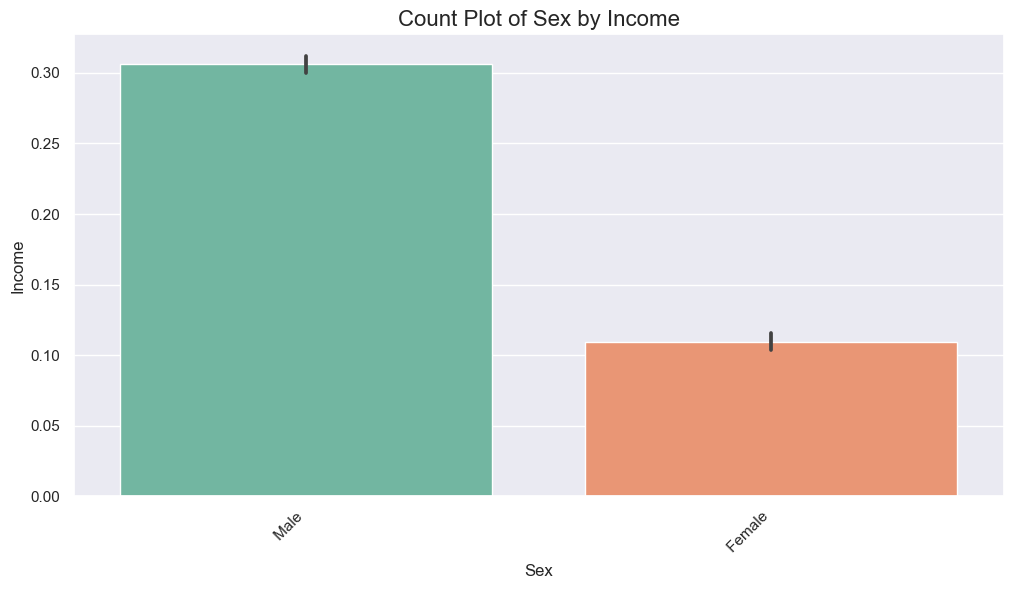

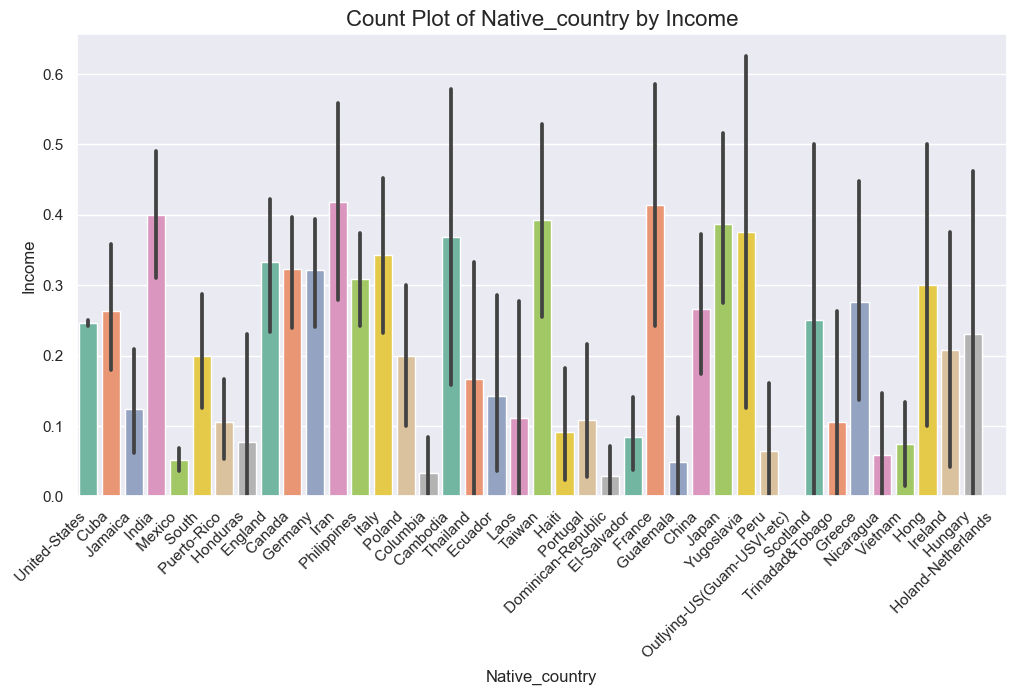

In [32]:
# Categorical columns in the dataset
categorical_columns = ['Workclass', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']

# Set the style of seaborn for better visualization
sns.set(style="darkgrid")

# Plot count plots for each categorical variable
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    
    # Set the order for 'Education' variable
    if column == 'Education':
        order = sorted(df['Education'].unique(), key=lambda x: [' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th', 
                ' HS-grad', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Masters', ' Doctorate', ' Prof-school'].index(x))
        sns.barplot(x=column, y='Income', data=df1, palette='Set2', order=order)
    else:
        sns.barplot(x=column, y='Income', data=df1, palette='Set2')
    
    plt.title(f'Count Plot of {column} by Income', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.show()

## <ins> Heat Map </ins>

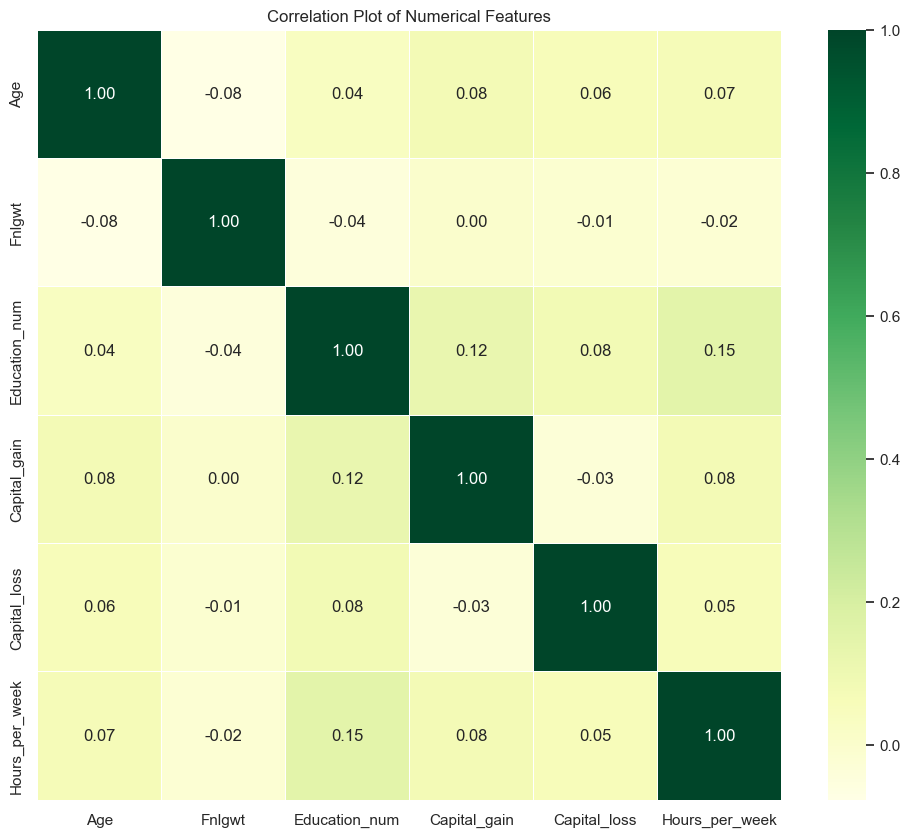

In [33]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Create a correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="YlGn", fmt=".2f", linewidths=.5)

# Show the plot
plt.title("Correlation Plot of Numerical Features")
plt.show()


## <font color='orange'> Multivariate Analysis </font>

In [34]:
mult_df = df.where(df.Income == " >50K").pivot_table(values=['Income'], 
                                                             index='Education',
                                                             columns='Workclass', 
                                                             aggfunc='count')

In [35]:
mult_df.sort_index()

Income                                    \
Workclass      Federal-gov  Local-gov  Private  Self-emp-inc   
Education                                                      
 10th                  NaN        1.0     49.0           3.0   
 11th                  1.0        2.0     45.0           4.0   
 12th                  NaN        2.0     25.0           1.0   
 1st-4th               NaN        NaN      5.0           NaN   
 5th-6th               NaN        1.0      9.0           2.0   
 7th-8th               NaN        1.0     20.0           5.0   
 9th                   1.0        3.0     19.0           NaN   
 Assoc-acdm           19.0       28.0    176.0          18.0   
 Assoc-voc            15.0       25.0    269.0          19.0   
 Bachelors            95.0      162.0   1540.0         171.0   
 Doctorate            15.0       17.0    143.0          29.0   
 HS-grad              73.0       90.0   1164.0         119.0   
 Masters              47.0      173.0    552.0          57.0   
 Prof-school          23.0       19.0    179.0          78.0   
 Some-college         82.0       93.0    957.0         116.0   

                                            
Workclass      Self-emp-not-inc  State-gov  
Education                                   
 10th                       7.0        2.0  
 11th                       7.0        1.0  
 12th                       3.0        2.0  
 1st-4th                    1.0        NaN  
 5th-6th                    4.0        NaN  
 7th-8th                   14.0        NaN  
 9th                        4.0        NaN  
 Assoc-acdm                18.0        6.0  
 Assoc-voc                 21.0       12.0  
 Bachelors                163.0       90.0  
 Doctorate                 31.0       71.0  
 HS-grad                  179.0       49.0  
 Masters                   59.0       71.0  
 Prof-school              106.0       18.0  
 Some-college             107.0       31.0

Text(0.5, 1.0, 'Incomes >50K counts of various Educated categories Vs Work Class')

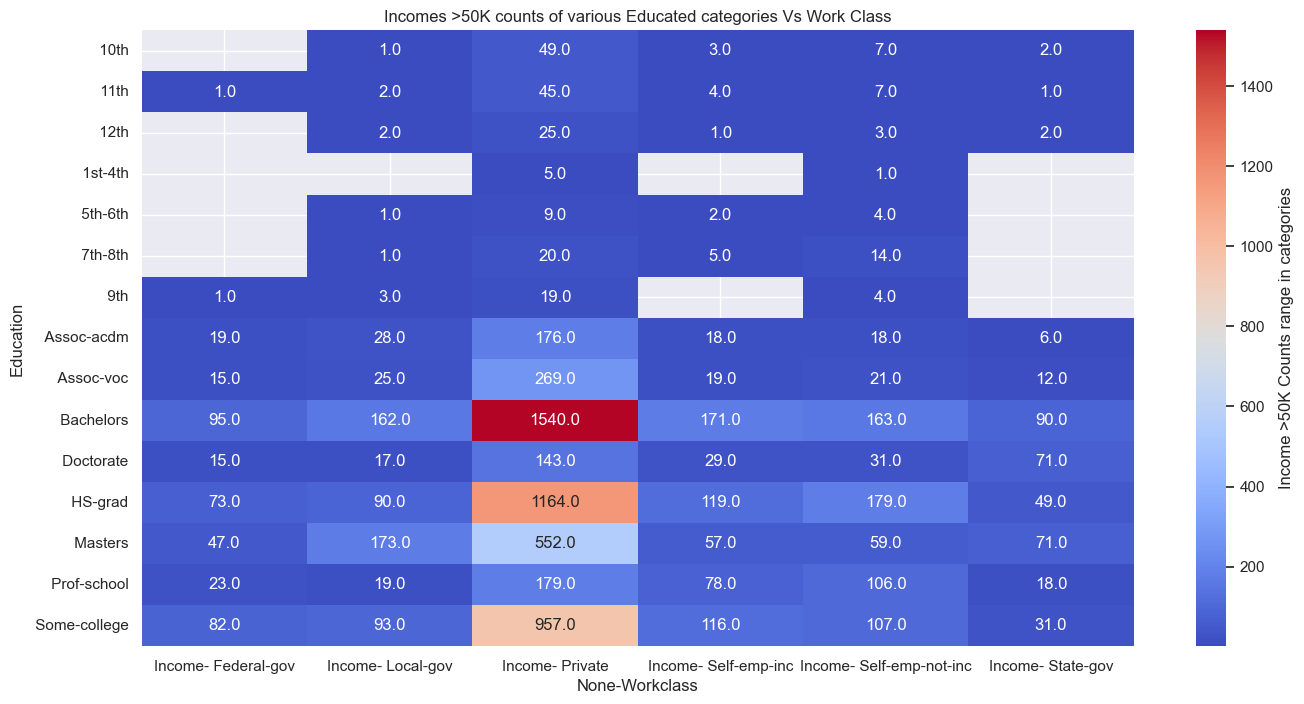

In [36]:
plt.figure(figsize=(16, 8))
sns.heatmap(mult_df.sort_index(), annot=True, fmt='.1f', cbar_kws= {'label':'Income >50K Counts range in categories'}, cmap='coolwarm')
plt.title('Incomes >50K counts of various Educated categories Vs Work Class')

In [37]:
mult_df1 = df.where(df.Income == " >50K").pivot_table(values=['Income'], 
                                                             index='Occupation',
                                                             columns='Workclass', 
                                                             aggfunc='count')

In [38]:
mult_df1.sort_index()

Income                                    \
Workclass           Federal-gov  Local-gov  Private  Self-emp-inc   
Occupation                                                          
 Adm-clerical             101.0       33.0    321.0           9.0   
 Armed-Forces               1.0        NaN      NaN           NaN   
 Craft-repair              21.0       40.0    721.0          38.0   
 Exec-managerial           92.0      102.0   1295.0         254.0   
 Farming-fishing            2.0        2.0     30.0          15.0   
 Handlers-cleaners          2.0        7.0     73.0           NaN   
 Machine-op-inspct          2.0        2.0    224.0           5.0   
 Other-service              3.0       12.0    100.0           6.0   
 Priv-house-serv            NaN        NaN      1.0           NaN   
 Prof-specialty            95.0      254.0   1198.0         121.0   
 Protective-serv           14.0      135.0     30.0           2.0   
 Sales                      5.0        3.0    684.0         160.0   
 Tech-support              25.0       15.0    221.0           2.0   
 Transport-moving           8.0       12.0    254.0          10.0   

                                                 
Workclass           Self-emp-not-inc  State-gov  
Occupation                                       
 Adm-clerical                   16.0       27.0  
 Armed-Forces                    NaN        NaN  
 Craft-repair                   95.0       14.0  
 Exec-managerial               144.0       81.0  
 Farming-fishing                64.0        2.0  
 Handlers-cleaners               3.0        1.0  
 Machine-op-inspct              11.0        5.0  
 Other-service                  12.0        4.0  
 Priv-house-serv                 NaN        NaN  
 Prof-specialty                210.0      171.0  
 Protective-serv                 1.0       29.0  
 Sales                         128.0        3.0  
 Tech-support                   11.0        9.0  
 Transport-moving               29.0        7.0

Text(0.5, 1.0, 'Incomes >50K counts of various Occupation categories Vs Work Class')

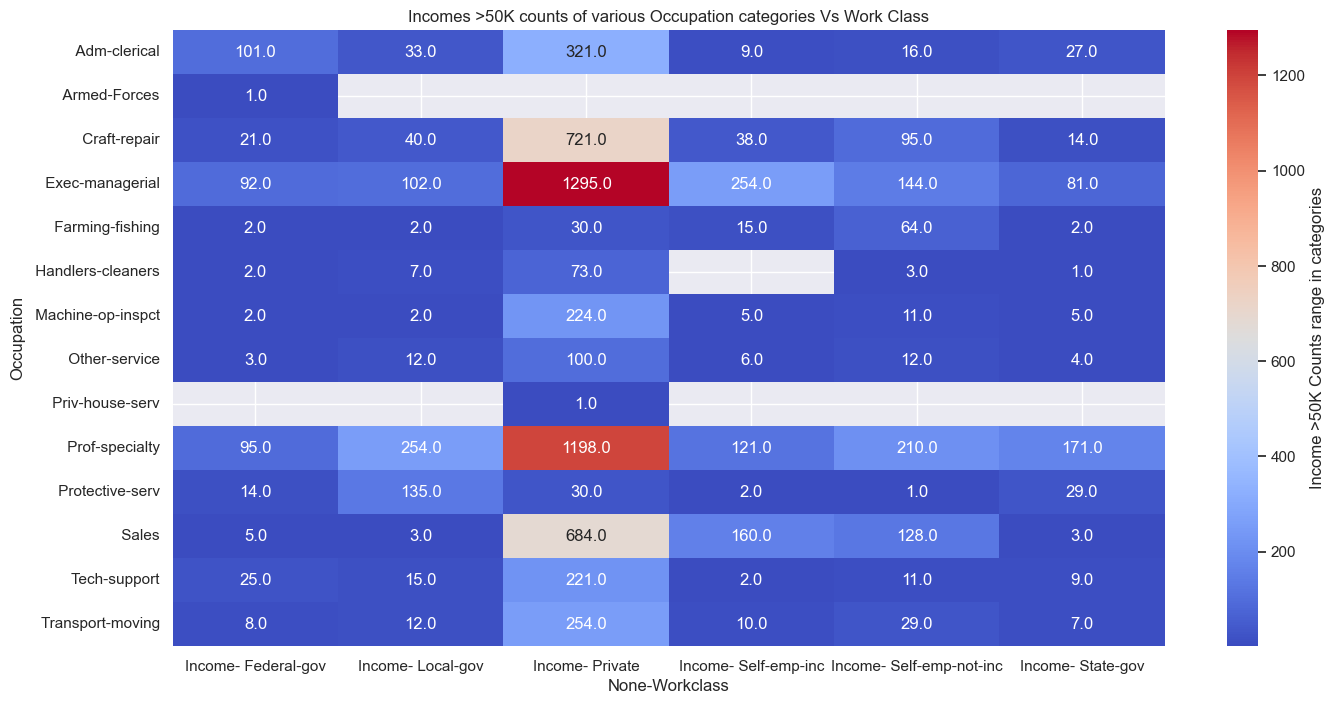

In [39]:
plt.figure(figsize=(16, 8))
sns.heatmap(mult_df1.sort_index(), annot=True, fmt='.1f', cbar_kws= {'label':'Income >50K Counts range in categories'}, cmap='coolwarm')
plt.title('Incomes >50K counts of various Occupation categories Vs Work Class')

In [40]:
mult_df2 = df.where(df.Income == " >50K").pivot_table(values=['Income'], 
                                                             index='Race',
                                                             columns='Education', 
                                                             aggfunc='count')

In [42]:
mult_df2.sort_index()

Income                                               \
Education             10th  11th  12th  1st-4th  5th-6th  7th-8th   9th   
Race                                                                      
 Amer-Indian-Eskimo    NaN   2.0   NaN      NaN      NaN      NaN   NaN   
 Asian-Pac-Islander    1.0   1.0   1.0      NaN      3.0      NaN   1.0   
 Black                 6.0   7.0   5.0      1.0      NaN      2.0   4.0   
 Other                 1.0   NaN   NaN      NaN      1.0      NaN   NaN   
 White                54.0  50.0  27.0      5.0     12.0     38.0  22.0   

                                                                           \
Education            Assoc-acdm  Assoc-voc  Bachelors  Doctorate  HS-grad   
Race                                                                        
 Amer-Indian-Eskimo         1.0        1.0        8.0        2.0     11.0   
 Asian-Pac-Islander         8.0        9.0       97.0       18.0     34.0   
 Black                     19.0       18.0       96.0        9.0     86.0   
 Other                      2.0        NaN        5.0        1.0      2.0   
 White                    235.0      333.0     2015.0      276.0   1541.0   

                                                         
Education            Masters  Prof-school  Some-college  
Race                                                     
 Amer-Indian-Eskimo      3.0          2.0           6.0  
 Asian-Pac-Islander     43.0         27.0          33.0  
 Black                  40.0          8.0          86.0  
 Other                   2.0          4.0           7.0  
 White                 871.0        382.0        1254.0

Text(0.5, 1.0, 'Incomes >50K counts of various Race categories Vs Education categories')

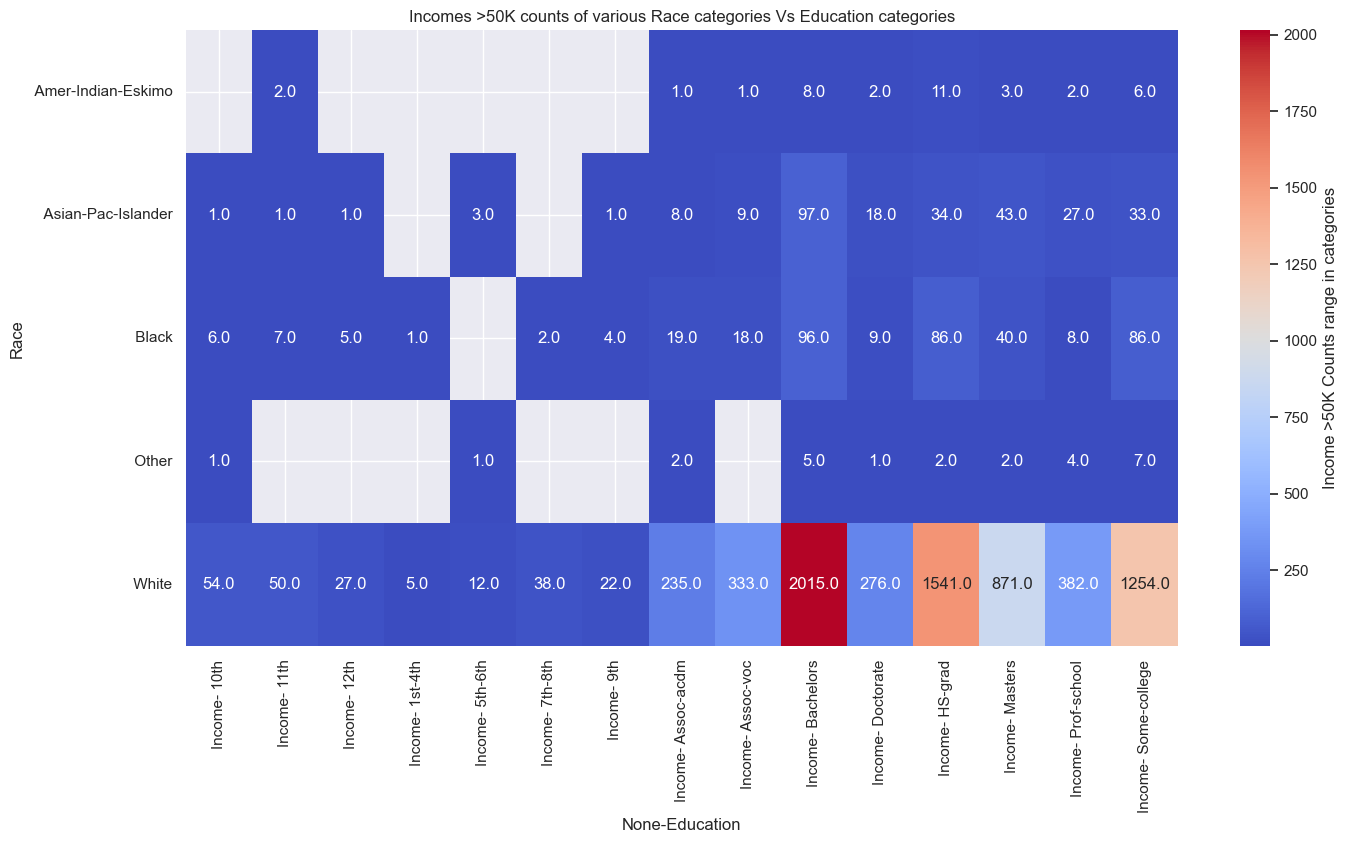

In [43]:
plt.figure(figsize=(16, 8))
sns.heatmap(mult_df2.sort_index(), annot=True, fmt='.1f', cbar_kws= {'label':'Income >50K Counts range in categories'}, cmap='coolwarm')
plt.title('Incomes >50K counts of various Race categories Vs Education categories')